In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
num = pd.read_csv('numeric.csv')
nom = pd.read_csv('nominal.csv')

# Ensure that I have both datasets.
num_len = len(num)
nom_len = len(nom)
assert(num_len == nom_len)
total = num_len

In [ ]:
# Combine daily and weekend alcohol consumption into one column.
nom['alc'] = nom['Dalc'] + nom['Walc']
nom = nom.drop(['Dalc', 'Walc'], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5]), <a list of 34 Text major ticklabel objects>)

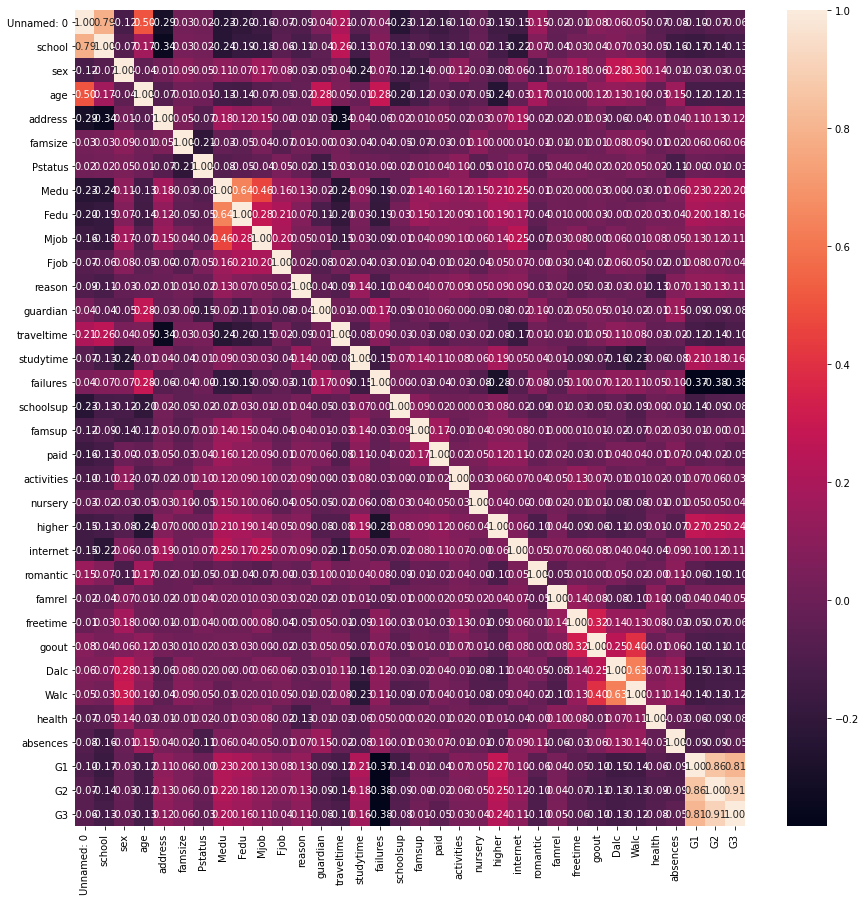

In [ ]:
# Make a heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(num.corr(), annot=True, fmt=".2f", cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

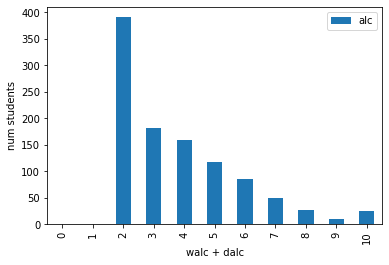

In [ ]:
alc_stcount = pd.DataFrame(columns=['alc'])
for i in range(11):
    count_at_i = len( nom[nom['alc'] == i] )
    alc_stcount = alc_stcount.append(
        {'alc': count_at_i}, ignore_index=True)
alc_stcount.plot.bar(y='alc')
plt.ylabel('num students')
plt.xlabel('walc + dalc')
plt.show()

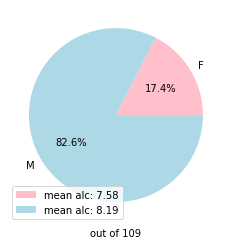

In [ ]:
# ...
alc_cutoff = 6
sex_labels = ['F', 'M']
sex_colors = ['pink', 'lightblue']
male_alc = nom[(nom['sex'] == 'M') & (nom['alc'] > alc_cutoff)]
fema_alc = nom[(nom['sex'] == 'F') & (nom['alc'] > alc_cutoff)]
sex_sizes = [ len(fema_alc), len(male_alc) ]
plt.pie(sex_sizes, colors=sex_colors, labels=sex_labels, 
        autopct='%1.1f%%')
plt.legend([
    f'mean alc: {fema_alc.alc.mean():.2f}', 
    f'mean alc: {male_alc.alc.mean():.2f}'])
plt.xlabel(f'out of { sum(sex_sizes) }')
plt.show()

In [ ]:
'''
# Let's create a new column of whether or not a given student is an alcoholic.
def label_alc(row) -> str:
    if row['Dalc'] == 5 \
        or row['Walc'] + row['Dalc'] >= 7:
        return 'yes'
    else: 
        return 'no'

# Add new alcoholic column.
nom['alcoholic'] = nom.apply(lambda row: label_alc(row), axis=1)
print('There are', len(nom[nom['alcoholic'] == 'yes']), 'alcoholics.')
'''

"\n# Let's create a new column of whether or not a given student is an alcoholic.\ndef label_alc(row) -> str:\n    if row['Dalc'] == 5         or row['Walc'] + row['Dalc'] >= 7:\n        return 'yes'\n    else: \n        return 'no'\n\n# Add new alcoholic column.\nnom['alcoholic'] = nom.apply(lambda row: label_alc(row), axis=1)\nprint('There are', len(nom[nom['alcoholic'] == 'yes']), 'alcoholics.')\n"

In [ ]:
'''
# Pie plot.
# Want count of GE4.
# Want count of LE4.
alc_fscmp = pd.DataFrame({'count': [
    len(nom[(nom['alcoholic'] == 'yes') & (nom['famsize'] == 'GT3')]),
    len(nom[(nom['alcoholic'] == 'yes') & (nom['famsize'] == 'LE3')])
]}, index=['GT3', 'LE3'])
alc_fscmp_plt = alc_fscmp.plot.pie(y='count', figsize=(10, 10))
'''

"\n# Pie plot.\n# Want count of GE4.\n# Want count of LE4.\nalc_fscmp = pd.DataFrame({'count': [\n    len(nom[(nom['alcoholic'] == 'yes') & (nom['famsize'] == 'GT3')]),\n    len(nom[(nom['alcoholic'] == 'yes') & (nom['famsize'] == 'LE3')])\n]}, index=['GT3', 'LE3'])\nalc_fscmp_plt = alc_fscmp.plot.pie(y='count', figsize=(10, 10))\n"

In [ ]:
'''
# Compare alcohlics with guardian.
alc_gdcmp = pd.DataFrame({'count': [
    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'other')]),
    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'father')]),
    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'mother')]),
]}, index=['other', 'father', 'mother'])
alc_gdcmp_plt = alc_gdcmp.plot.pie(y='count', figsize=(10, 10))
'''

"\n# Compare alcohlics with guardian.\nalc_gdcmp = pd.DataFrame({'count': [\n    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'other')]),\n    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'father')]),\n    len(nom[(nom['alcoholic'] == 'yes') & (nom['guardian'] == 'mother')]),\n]}, index=['other', 'father', 'mother'])\nalc_gdcmp_plt = alc_gdcmp.plot.pie(y='count', figsize=(10, 10))\n"

In [ ]:
dalc_ge4 = nom['alcoholic'] == 'yes'
grdn_oth = nom['guardian'] == 'other'
dalc_oth = nom[dalc_ge4 & grdn_oth]
dalc_oth

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alcoholic
192,192,GP,M,17,U,GT3,T,1,2,at_home,services,other,other,2,2,0,no,no,yes,yes,no,yes,yes,no,4,4,4,4,5,5,12,7,8,8,yes
390,390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,yes
538,143,GP,F,18,U,GT3,A,3,2,other,services,course,other,1,3,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,5,1,5,10,12,11,11,yes
601,206,GP,M,17,U,GT3,T,1,2,at_home,services,other,other,2,2,0,no,no,no,yes,no,yes,yes,no,4,4,4,4,5,5,16,10,11,12,yes
764,369,GP,F,19,U,GT3,T,1,1,other,other,course,other,3,3,0,no,no,no,yes,yes,no,no,yes,1,5,5,4,3,5,12,10,10,11,yes
800,405,GP,F,19,U,LE3,A,2,3,at_home,other,home,other,2,1,1,no,no,no,no,yes,no,yes,no,2,2,3,3,4,5,16,10,11,11,yes
808,413,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,9,10,10,yes
810,415,GP,F,19,U,GT3,T,4,4,teacher,other,home,other,1,1,1,no,yes,no,no,yes,yes,yes,yes,3,2,5,4,4,5,5,9,10,11,yes



    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - 1 hour)
    studytime - weekly study time (numeric: 1 - 10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
nom

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,alcoholic,alc
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,5,6,6,no,2
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,5,5,6,no,2
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,7,8,10,no,5
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,15,14,15,no,2
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,6,10,10,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,4,10,11,10,no,3
1040,645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,4,15,15,16,no,2
1041,646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,5,6,11,12,9,no,2
1042,647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,2,6,10,10,10,yes,7


In [ ]:
num

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,644,1,0,19,0,0,1,2,3,3,2,0,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
1040,645,1,0,18,1,1,1,3,1,4,3,0,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
1041,646,1,0,18,1,0,1,1,1,2,2,0,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
1042,647,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10
